In [20]:
#read the dataset 
import pandas as pd 
data = pd.read_csv('bigmart_data.csv')

In [2]:
#drop the null values 
data = data.dropna(how='any')

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
#Line Chart: mean price per item 
price_by_item = data.groupby('Item_Type').Item_MRP.mean()[:10]
price_by_item

Item_Type
Baking Goods             125.795653
Breads                   141.300639
Breakfast                134.090683
Canned                   138.551179
Dairy                    149.481471
Frozen Foods             140.095830
Fruits and Vegetables    145.418257
Hard Drinks              140.102908
Health and Hygiene       131.437324
Household                149.884244
Name: Item_MRP, dtype: float64

In [5]:
price_by_item = data.groupby('Item_Type').Item_MRP.mean()[:10]
x = price_by_item.index.tolist()
y = price_by_item.values.tolist()

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.figure(figsize=(16,8))
plt.title("Mean price for each item type")
plt.xlabel("Item Type")
plt.ylabel("Mean Price")
plt.xticks(labels=x, ticks=np.arange(len(x)))
plt.plot(x,y)

In [7]:
# Bar Chart: what is the mean sales for each outlet size? 
sales_by_outlet_size = data.groupby("Outlet_Size").Item_Outlet_Sales.mean()
sales_by_outlet_size

Outlet_Size
High      2298.995256
Medium    2172.116599
Small     2358.343066
Name: Item_Outlet_Sales, dtype: float64

In [8]:
 #sort by sales 
sales_by_outlet_size.sort_values(inplace=True)

In [9]:
sales_by_outlet_size

Outlet_Size
Medium    2172.116599
High      2298.995256
Small     2358.343066
Name: Item_Outlet_Sales, dtype: float64

In [10]:
x = sales_by_outlet_size.index.to_list()
y = sales_by_outlet_size.values.tolist()

In [11]:
x 

['Medium', 'High', 'Small']

In [12]:
y 

[2172.1165986006486, 2298.9952555793975, 2358.343066451614]

Text(0.5, 1.0, 'Mean sales for each outlet size')

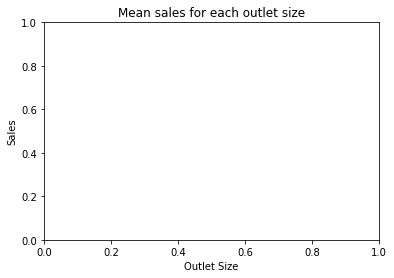

In [13]:
plt.xlabel("Outlet Size")
plt.ylabel("Sales")
plt.title("Mean sales for each outlet size")

<BarContainer object of 3 artists>

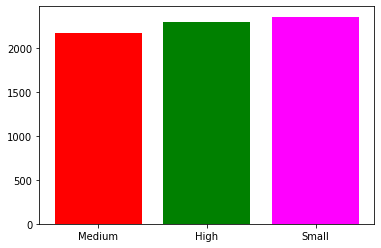

In [14]:
plt.xticks(labels=x, ticks=np.arange(len(x)))
plt.bar(x,y,color = ['red','green','magenta'])

(array([247., 249., 208.,  94., 261., 329., 337., 343., 164., 279., 304.,
        276., 339., 318., 113., 143., 171., 145., 148., 182.]),
 array([ 31.49   ,  43.25992,  55.02984,  66.79976,  78.56968,  90.3396 ,
        102.10952, 113.87944, 125.64936, 137.41928, 149.1892 , 160.95912,
        172.72904, 184.49896, 196.26888, 208.0388 , 219.80872, 231.57864,
        243.34856, 255.11848, 266.8884 ]),
 <a list of 20 Patch objects>)

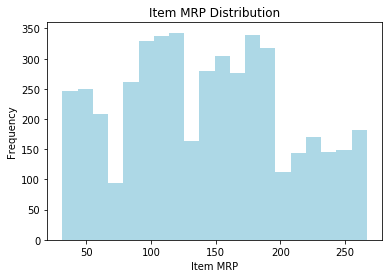

In [15]:
#Histogram: Distribution of Item price 
plt.title("Item MRP Distribution")
plt.xlabel("Item MRP")
plt.ylabel("Frequency")
plt.hist(data['Item_MRP'], bins=20, color='lightblue')

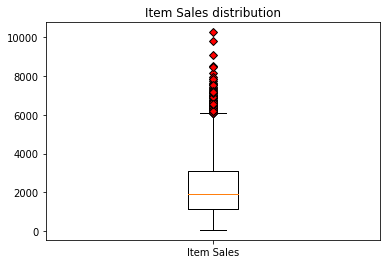

In [16]:
#Box Plots: Distribution of Sales 
data_box = data['Item_Outlet_Sales']
#create outlier point shape 
red_diamond = dict(markerfacecolor = 'r', marker = 'D')
plt.title("Item Sales distribution")
plt.boxplot(data_box.values, labels= ['Item Sales'], flierprops= red_diamond);

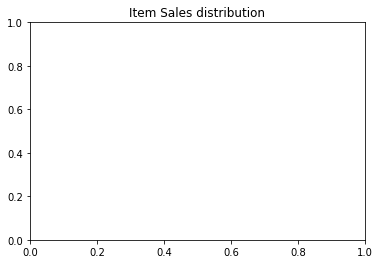

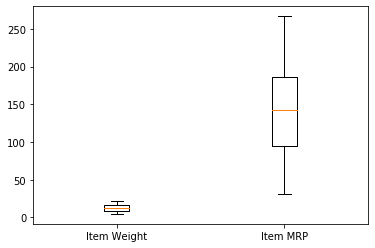

In [17]:
#Multiple Box Plots: Distribution of Sales 
data_box = data[['Item_Weight', 'Item_MRP']]
#create outlier point shape 
red_diamond = dict(markerfacecolor = 'r', marker = 'D')
plt.title("Item Sales distribution")
fig, ax = plt.subplots()
plt.boxplot(data_box.values, labels= ['Item Weight','Item MRP']);

{'bodies': [<matplotlib.collections.PolyCollection at 0x16bc66b5f08>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x16bc66b02c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x16bc66becc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x16bc66be808>}

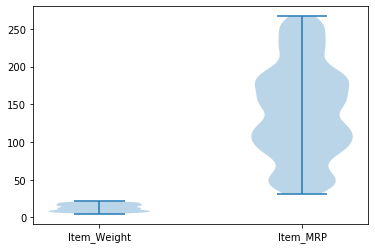

In [18]:
#Violin Plots: Density distribution of item weights and item price 
dataV = data[['Item_Weight', 'Item_MRP']]
fig = plt.subplots()
plt.xticks(ticks=[1,2], labels=['Item_Weight','Item_MRP'])
plt.violinplot(dataV.values)

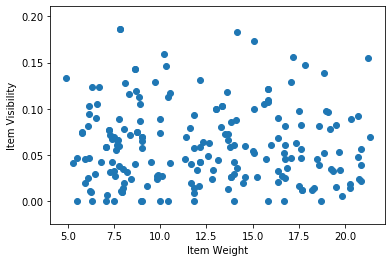

In [19]:
#Scatter Plot: Relative Distribution of item weight and its visibility  
plt.xlabel("Item Weight")
plt.ylabel("Item Visibility")
plt.scatter(data['Item_Weight'][:200], data['Item_Visibility'][:200])